In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
# from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from multiprocessing import Pool  # for parallel computation
from itertools import repeat  # repeating in iteration
import seaborn as sns

### Font

In [2]:
# font = {'family': 'DejaVu Sans',
#         'color':  'black',
#         'weight': 'bold',
#         'size': 16,
#         }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 12,
        }

inside_font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 6,
        }

def get_font(size):
    return {'family': 'DejaVu Sans',
        'color':  'black',
        'size': size,
        }

# Color

(0.5, 2)

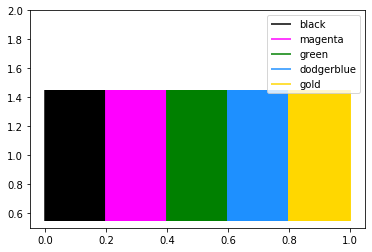

In [3]:
# digonto vai nature paper
colors = ['black', 'magenta', 'green', 'deepskyblue', 'orange']


colors = ['black', 'magenta', 'green', 'dodgerblue', 'gold']


# ok 1
# colors = ['black', 'purple', 'magenta', 'green', 'dodgerblue', 'orange', 'gold']

spikes = np.linspace(0, 1, 2000)
size=spikes.shape[0]//len(colors)

for a in range(len(colors)):
    plt.eventplot(spikes[a*size:(a+1)*size], orientation='horizontal', linelengths=0.9, color = colors[a], label=colors[a])
    pass
# plt.show()
plt.legend()
plt.ylim([0.5,2])

## defined fundtions

In [4]:
def plot_one(pc, one_by_nu, gamma_by_nu):
    lengths = np.sort(list(data.keys()))
    for L in lengths:
        p, C, C_conv, X, X_conv = data[L].T
        x = (p-pc)*L**(one_by_nu)
        y = X_conv*L**(-gamma_by_nu)
        plt.plot(x, y, label='L={}'.format(L), linewidth=1)
        pass

    plt.legend()

In [5]:
def plot_for(pc, one_by_nu, gamma_by_nu):

    f = plt.figure(figsize=(20, 10), dpi=200)

#     f.add_subplot(1, 2, 1)
#     plot_one(pc, one_by_nu, gamma_by_nu)
#     plt.xlim(-2, 2)
#     plt.legend()

#     f.add_subplot(2, 2, 2)
#     plot_one(pc, one_by_nu, gamma_by_nu)
#     plt.xlim(-7, -3)
#     plt.ylim(0, 1)
#     plt.legend()


#     f.add_subplot(1, 2, 2)
    plot_one(pc, one_by_nu, gamma_by_nu)
    plt.xlim(-0.5, 0.5)
    plt.ylim(0.6, 1.4)
    plt.legend()
    


#     f.add_subplot(2, 2, 4)
#     plot_one(pc, one_by_nu, gamma_by_nu)
#     plt.xlim(3, 7)
#     plt.ylim(0, 1)
#     plt.legend()
    
    f.text(0.5, 0.5, 'pc={},1/nu={},gamma/nu={}'.format(pc, one_by_nu, gamma_by_nu), fontdict=font)
    
    out_file_name = out_img_dir + '/tuning/' + signature
    out_file_name += '-susceptibility-pc{:.4f}_gamma_{:.3f}_nu_{:.3f}.png'.format(pc, gamma_by_nu, one_by_nu)
    print(out_file_name)
    plt.savefig(out_file_name)

### directories

In [6]:
out_img_dir = "../figures/"
in_data_dir = "../data/site-percolation/specific_heat-susceptibility/"

#### signatures

In [7]:
signature = 'sq_lattice_site_percolation_periodic_'
files = glob.glob(in_data_dir + signature + '*txt_convolved.txt')

# print("chosen signature")
print(signature)

sq_lattice_site_percolation_periodic_


In [8]:
files

['../data/site-percolation/specific_heat-susceptibility/sq_lattice_site_percolation_periodic_300-calculated-.txt_convolved.txt',
 '../data/site-percolation/specific_heat-susceptibility/sq_lattice_site_percolation_periodic_250-calculated-.txt_convolved.txt',
 '../data/site-percolation/specific_heat-susceptibility/sq_lattice_site_percolation_periodic_400-calculated-.txt_convolved.txt',
 '../data/site-percolation/specific_heat-susceptibility/sq_lattice_site_percolation_periodic_200-calculated-.txt_convolved.txt',
 '../data/site-percolation/specific_heat-susceptibility/sq_lattice_site_percolation_periodic_350-calculated-.txt_convolved.txt']

In [9]:
data = dict()
ensembles = dict()
for file in files:
    f = open(file)
    l = f.readline()
#     print(l)
    header = json.loads(l)
    print(header)
    L = int(header['length'])
    ensmbl = int(header['ensemble_size'])
    if L in ensembles:
        ensembles[L] += ensmbl
    else:
        ensembles[L] = ensmbl

    p, C, C_conv, X, X_conv = np.loadtxt(file, usecols=(0,1,2,3,4), skiprows=1, unpack=True)
    
    if L in data:
        data[L] += ensmbl*np.array([p, C, C_conv, X, X_conv]).T
    else:
        data[L] = ensmbl*np.array([p, C, C_conv, X, X_conv]).T
    pass

#### taking average
for L in ensembles.keys():
    data[L] = data[L]/ensembles[L]

{'ensemble_size': 20000, 'length': 300}
{'ensemble_size': 20000, 'length': 250}
{'ensemble_size': 20000, 'length': 400}
{'ensemble_size': 20000, 'length': 200}
{'ensemble_size': 20000, 'length': 350}


In [10]:
ensembles

{300: 20000, 250: 20000, 400: 20000, 200: 20000, 350: 20000}

(0.5, 0.7)

/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


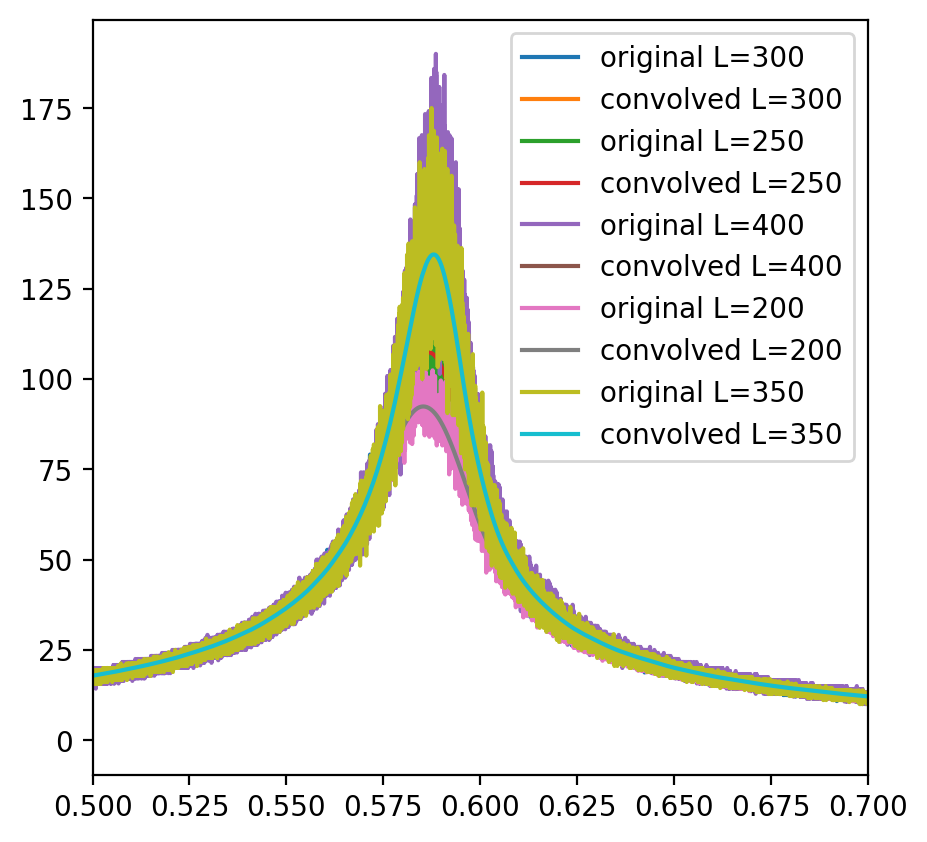

In [11]:
fig = plt.figure(figsize=(5, 5), dpi=200)
for L in data.keys():
    p, C, C_conv, X, X_conv = data[L].T

    plt.plot(p, C, label='original L={}'.format(L))
    plt.plot(p, C_conv, label='convolved L={}'.format(L))
    pass
    
plt.legend()
plt.xlim(0.5, 0.7)

In [13]:
pc = 0.5927
one_by_nu = 0.75
alpha_by_nu = 0.6799
beta_by_nu = 0.103
gamma_by_nu = 0.64071 # todo ~0.64

### Data collapse


(-10, 10)

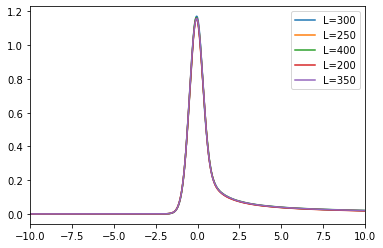

In [24]:
for L in data.keys():
    p, C, C_conv, X, X_conv = data[L].T
    
    x = (p-pc)*L**(one_by_nu)
    y = X_conv*L**(-gamma_by_nu)
    plt.plot(x, y, label='L={}'.format(L))
    pass
    
plt.legend()
plt.xlim(-10, 10)

## Finding exponent from log-log graph

[[5.29831737 3.54172135]
 [5.52146092 3.68699518]
 [5.70378247 3.81283893]
 [5.85793315 3.90027223]
 [5.99146455 3.9902758 ]]
../figures/sq_lattice_site_percolation_periodic__susceptibility-x-scaled-pc0.5927_gamma_0.6407_nu_0.750.eps


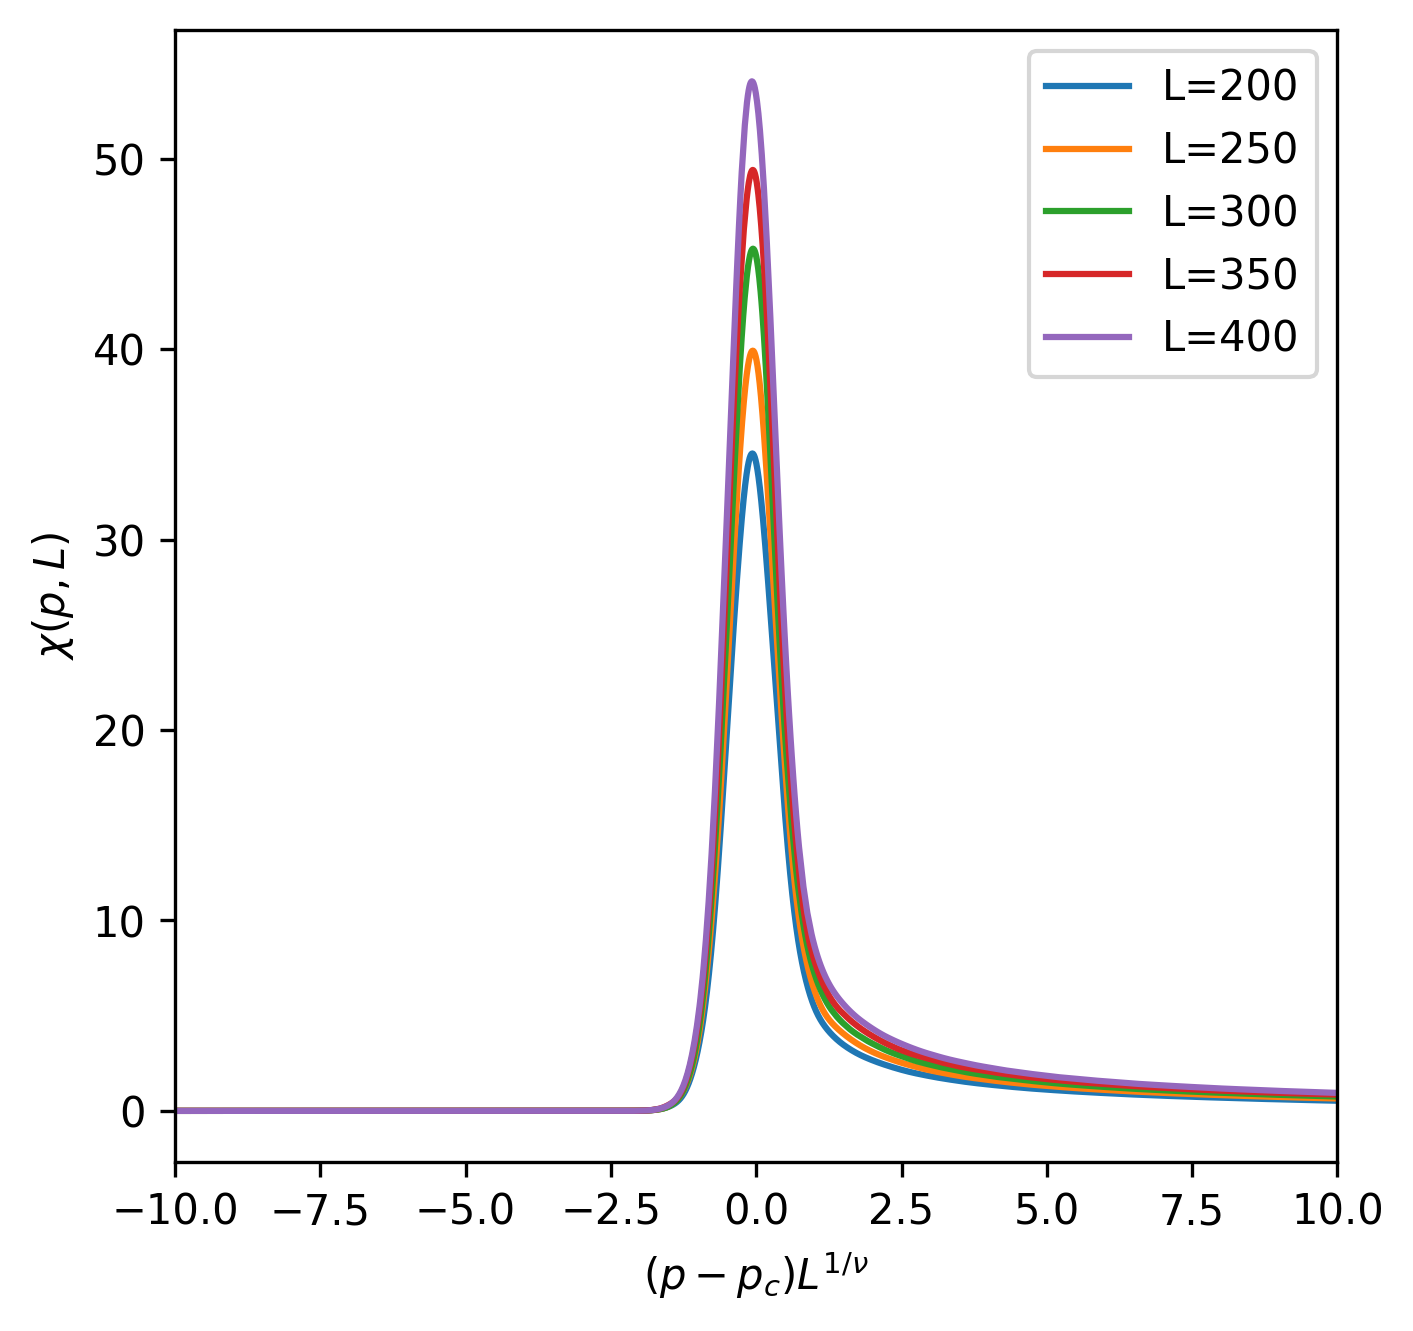

In [14]:
fig = plt.figure(figsize=(5,5), dpi=300)
Xh = []
lengths = np.sort(list(data.keys()))
for L in lengths:
    p, C, C_conv, X, X_conv = data[L].T
    
    x = (p-pc)*L**(one_by_nu)
    y = X_conv
    Xh.append([L, np.max(y)])
    plt.plot(x, y, label='L={}'.format(L))
    pass
plt.legend()
plt.xlim(-10, 10)

xh_log = np.log(Xh)
print(xh_log)
plt.xlabel(r'$(p-p_c)L^{1/\nu}$')
plt.ylabel(r'$\chi(p,L)$')

out_file_name = out_img_dir + signature
out_file_name += '_susceptibility-x-scaled-pc{:.4f}_gamma_{:.4f}_nu_{:.3f}.eps'.format(pc, gamma_by_nu, one_by_nu)
print(out_file_name)
# plt.savefig(out_file_name)

In [15]:
regress = stats.linregress(xh_log[:,0], xh_log[:,1])
regress

LinregressResult(slope=0.6453362462329335, intercept=0.12440099918623204, rvalue=0.9996731412702943, pvalue=7.093371344229915e-06, stderr=0.009528553095583318)

Text(0, 0.5, '$log(X_h)$')

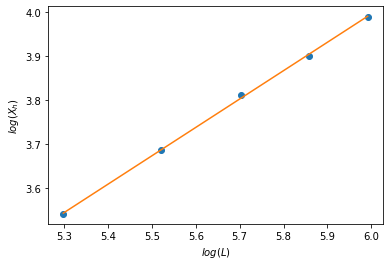

In [16]:
plt.plot(xh_log[:,0], xh_log[:,1], 'o')


x = np.linspace(np.min(xh_log[:,0]), np.max(xh_log[:,0]), 10)
y = regress[0]*x + regress[1]
plt.plot(x, y)

plt.xlabel(r'$log(L)$')
plt.ylabel(r'$log(X_h)$')

### defined constants and exponents

In [18]:
pc = 0.5702
one_by_nu = 0.70 # 0.69 to 0.71

In [19]:
# plot_for(pc, one_by_nu, 0.61)
# plot_for(pc, one_by_nu, 0.62)
# plot_for(pc, one_by_nu, 0.63)
# plot_for(pc, one_by_nu, 0.64)
# plot_for(pc, one_by_nu, 0.65)
# plot_for(pc, one_by_nu, 0.66)
# plot_for(pc, one_by_nu, 0.67)

# plot_for(pc, one_by_nu, 0.631)
# plot_for(pc, one_by_nu, 0.632)
# plot_for(pc, one_by_nu, 0.633)
# plot_for(pc, one_by_nu, 0.634)
# plot_for(pc, one_by_nu, 0.635)
# plot_for(pc, one_by_nu, 0.636)
# plot_for(pc, one_by_nu, 0.637)
# plot_for(pc, one_by_nu, 0.638)
# plot_for(pc, one_by_nu, 0.639)

# plot_for(pc, one_by_nu, 0.64)
# plot_for(pc, one_by_nu, 0.641)
# plot_for(pc, one_by_nu, 0.642)
# plot_for(pc, one_by_nu, 0.643)
# plot_for(pc, one_by_nu, 0.644)
# plot_for(pc, one_by_nu, 0.645)
# plot_for(pc, one_by_nu, 0.646)
# plot_for(pc, one_by_nu, 0.647)
# plot_for(pc, one_by_nu, 0.648)
# plot_for(pc, one_by_nu, 0.649)

# plot_for(pc, one_by_nu, 0.65)
# plot_for(pc, one_by_nu, 0.651)
# plot_for(pc, one_by_nu, 0.652)
# plot_for(pc, one_by_nu, 0.653)
# plot_for(pc, one_by_nu, 0.654)
# plot_for(pc, one_by_nu, 0.655)
# plot_for(pc, one_by_nu, 0.656)
# plot_for(pc, one_by_nu, 0.657)
# plot_for(pc, one_by_nu, 0.658)
# plot_for(pc, one_by_nu, 0.659)
# plot_for(pc, one_by_nu, 0.66)

### Find exponent statistically

#### Finds exponent based on the heighest peak

In [17]:
pc = 0.5701  # more accurate
one_by_nu = 0.72108108 # effect of new


## 1st convolution
gamma_by_nu = 0.6362

In [18]:
def find_height_difference(pc, one_by_nu, gamma_by_nu):
    heights = []
    lengths = np.sort(list(data.keys()))
    for L in lengths:
        p, C, C_conv, X, X_conv = data[L].T

        x = (p-pc)*L**(one_by_nu)
        y = X_conv*L**(-gamma_by_nu)
        heights.append(np.max(y))  # save maximum heights
        pass

    diff = np.max(heights) - np.min(heights)
#     diff = np.std(heights)  # using standard deviation
    return diff


def find_exponent_with_minimum_deviation(start, stop, step):
    exponents = np.arange(start, stop, step)
    deviations = []
    for ex in exponents:
        a = find_height_difference(pc, one_by_nu, ex)
        deviations.append(a)

        pass
    # print(deviations)
    min_dev = np.min(deviations)
    df = pd.DataFrame(np.array([exponents, deviations]).T)


    exponent = df[df[1]==min_dev]
    print(exponent)
    print("minimum deviation ", min_dev)

In [19]:
find_exponent_with_minimum_deviation(0.61, 0.65, 1e-4)

          0         1
187  0.6287  0.013346
minimum deviation  0.013345839320274333


## Find optimum 1/nu

In [14]:
def find_x_deviation(args):
    """
        date: 2018.11.07
        h : height
        a : 0 -> low value
            1 -> high value
        return : left standard deviation, right standard deviation
    """
    if len(args) < 4:
        print("3 argument is needed")
        return -1
    h, one_by_nu, y_scaler_exponent, plot_flag = args

    intersection_x = [] # [L, x_left, x_right] x values at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
    for N in data.keys():
        p, C, C_conv, X, X_conv = data[N].T
        y = X_conv*N**(-y_scaler_exponent)
        y_h = np.ones(p.shape[0])*h
        x = (p-pc)*N**(one_by_nu)
        idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
        if plot_flag:
            plt.plot(x, y, label='N={}'.format(N))
            plt.plot(x, y_h)
            plt.plot(x[idx], y_h[idx], 'o')
            pass
        
        intersection_x.append([N, x[idx][0], x[idx][1]])
        pass

    if plot_flag:
        plt.legend()
        plt.xlim(-5,5)
        plt.locator_params(nbins=5, axis='x')
        plt.xlabel(r'$(t-t_c) N ^{1/\nu}$')
        plt.ylabel(r'$\chi N^{-\gamma/\nu}$')
        pass
    intersection_x = np.array(intersection_x)
    intersection_x[:,1] /= np.max(intersection_x[:,1])  # to normalize things
    intersection_x[:,2] /= np.max(intersection_x[:,2])  # to normalize things
    return [np.std(intersection_x[:,1]), np.std(intersection_x[:,2])]

In [15]:
# one by nu is ex
ex = 0.74
eps = 0.06
one_by_nu_range = np.linspace(ex - eps, ex+eps, 1000)

[0.007720143563753704, 0.009963509150523705]

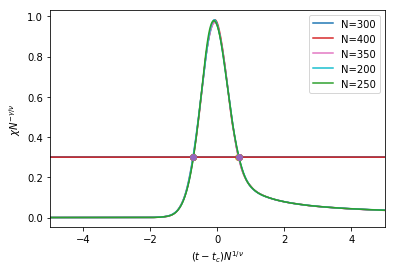

In [20]:
h = 0.3
find_x_deviation((h, one_by_nu, gamma_by_nu, True))

In [23]:
h = 0.3
p = Pool(4)
returned  = p.map(find_x_deviation, [(h, ex, gamma_by_nu, False) for ex in one_by_nu_range])

In [24]:
returned = np.array(returned)
left = returned[:,0]
right = returned[:,1]

### plotting

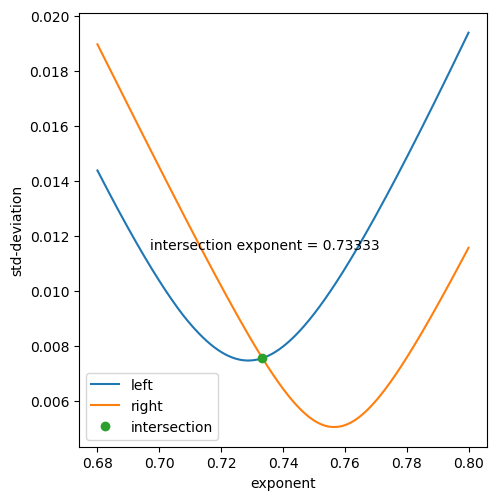

In [25]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.plot(one_by_nu_range, left, label='left')
plt.plot(one_by_nu_range, right, label='right')
idx = np.argwhere(np.diff(np.sign(left - right))).flatten()
plt.plot(one_by_nu_range[idx], left[idx], 'o', label='intersection')
plt.xlabel('exponent')
plt.ylabel('std-deviation')
plt.legend()

fig.text(0.3, 0.5, 'intersection exponent = {:.5f}'.format(one_by_nu_range[idx][0]))
plt.tight_layout(pad=0.7)
# filename = graph_location + "M{}/".format(M) + 'network_ba_explosive_M{}_specific_heat_minimizing_one_by_nu'.format(M)
# plt.savefig(filename)

## printing exponents 1/nu

In [26]:
l = np.argmin(left)
print(one_by_nu_range[l], ', ', left[l],', ', right[l])
r = np.argmin(right)
print(one_by_nu_range[r], ', ', left[r],', ', right[r])

print('middle 1/nu = ', one_by_nu_range[idx][0])
print("left 1/nu = ", one_by_nu_range[l])
print("right 1/nu = ", one_by_nu_range[r])

0.7287687687687687 ,  0.007480402651714266 ,  0.00842200768833961
0.7565165165165165 ,  0.010197809449094373 ,  0.00506661012740256
middle 1/nu =  0.7333333333333333
left 1/nu =  0.7287687687687687
right 1/nu =  0.7565165165165165


### estimated exponent

In [18]:

pc = 0.5927 # more accurate
one_by_nu = 0.75 # effect of new

## 1st convolution
alpha_by_nu = 0.6794 # fine tuning
beta_by_nu = 0.1041 # fine tuning
gamma_by_nu = 0.6407

### output graphs

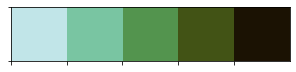

In [18]:
# n = 5
# palette = sns.cubehelix_palette(n_colors=n,start=1.2, light=0.85, dark=0.07, hue=1, gamma=0.95, rot=0.5)
# sns.palplot(palette)

In [19]:
# my_cmap = ListedColormap(sns.color_palette("cubehelix", 8).as_hex())
# sns.set()
# sns.set_palette(palette)

# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# sns.set_style(styles[4])

In [17]:
colors.reverse()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic__susceptibility-pc0.5927.eps


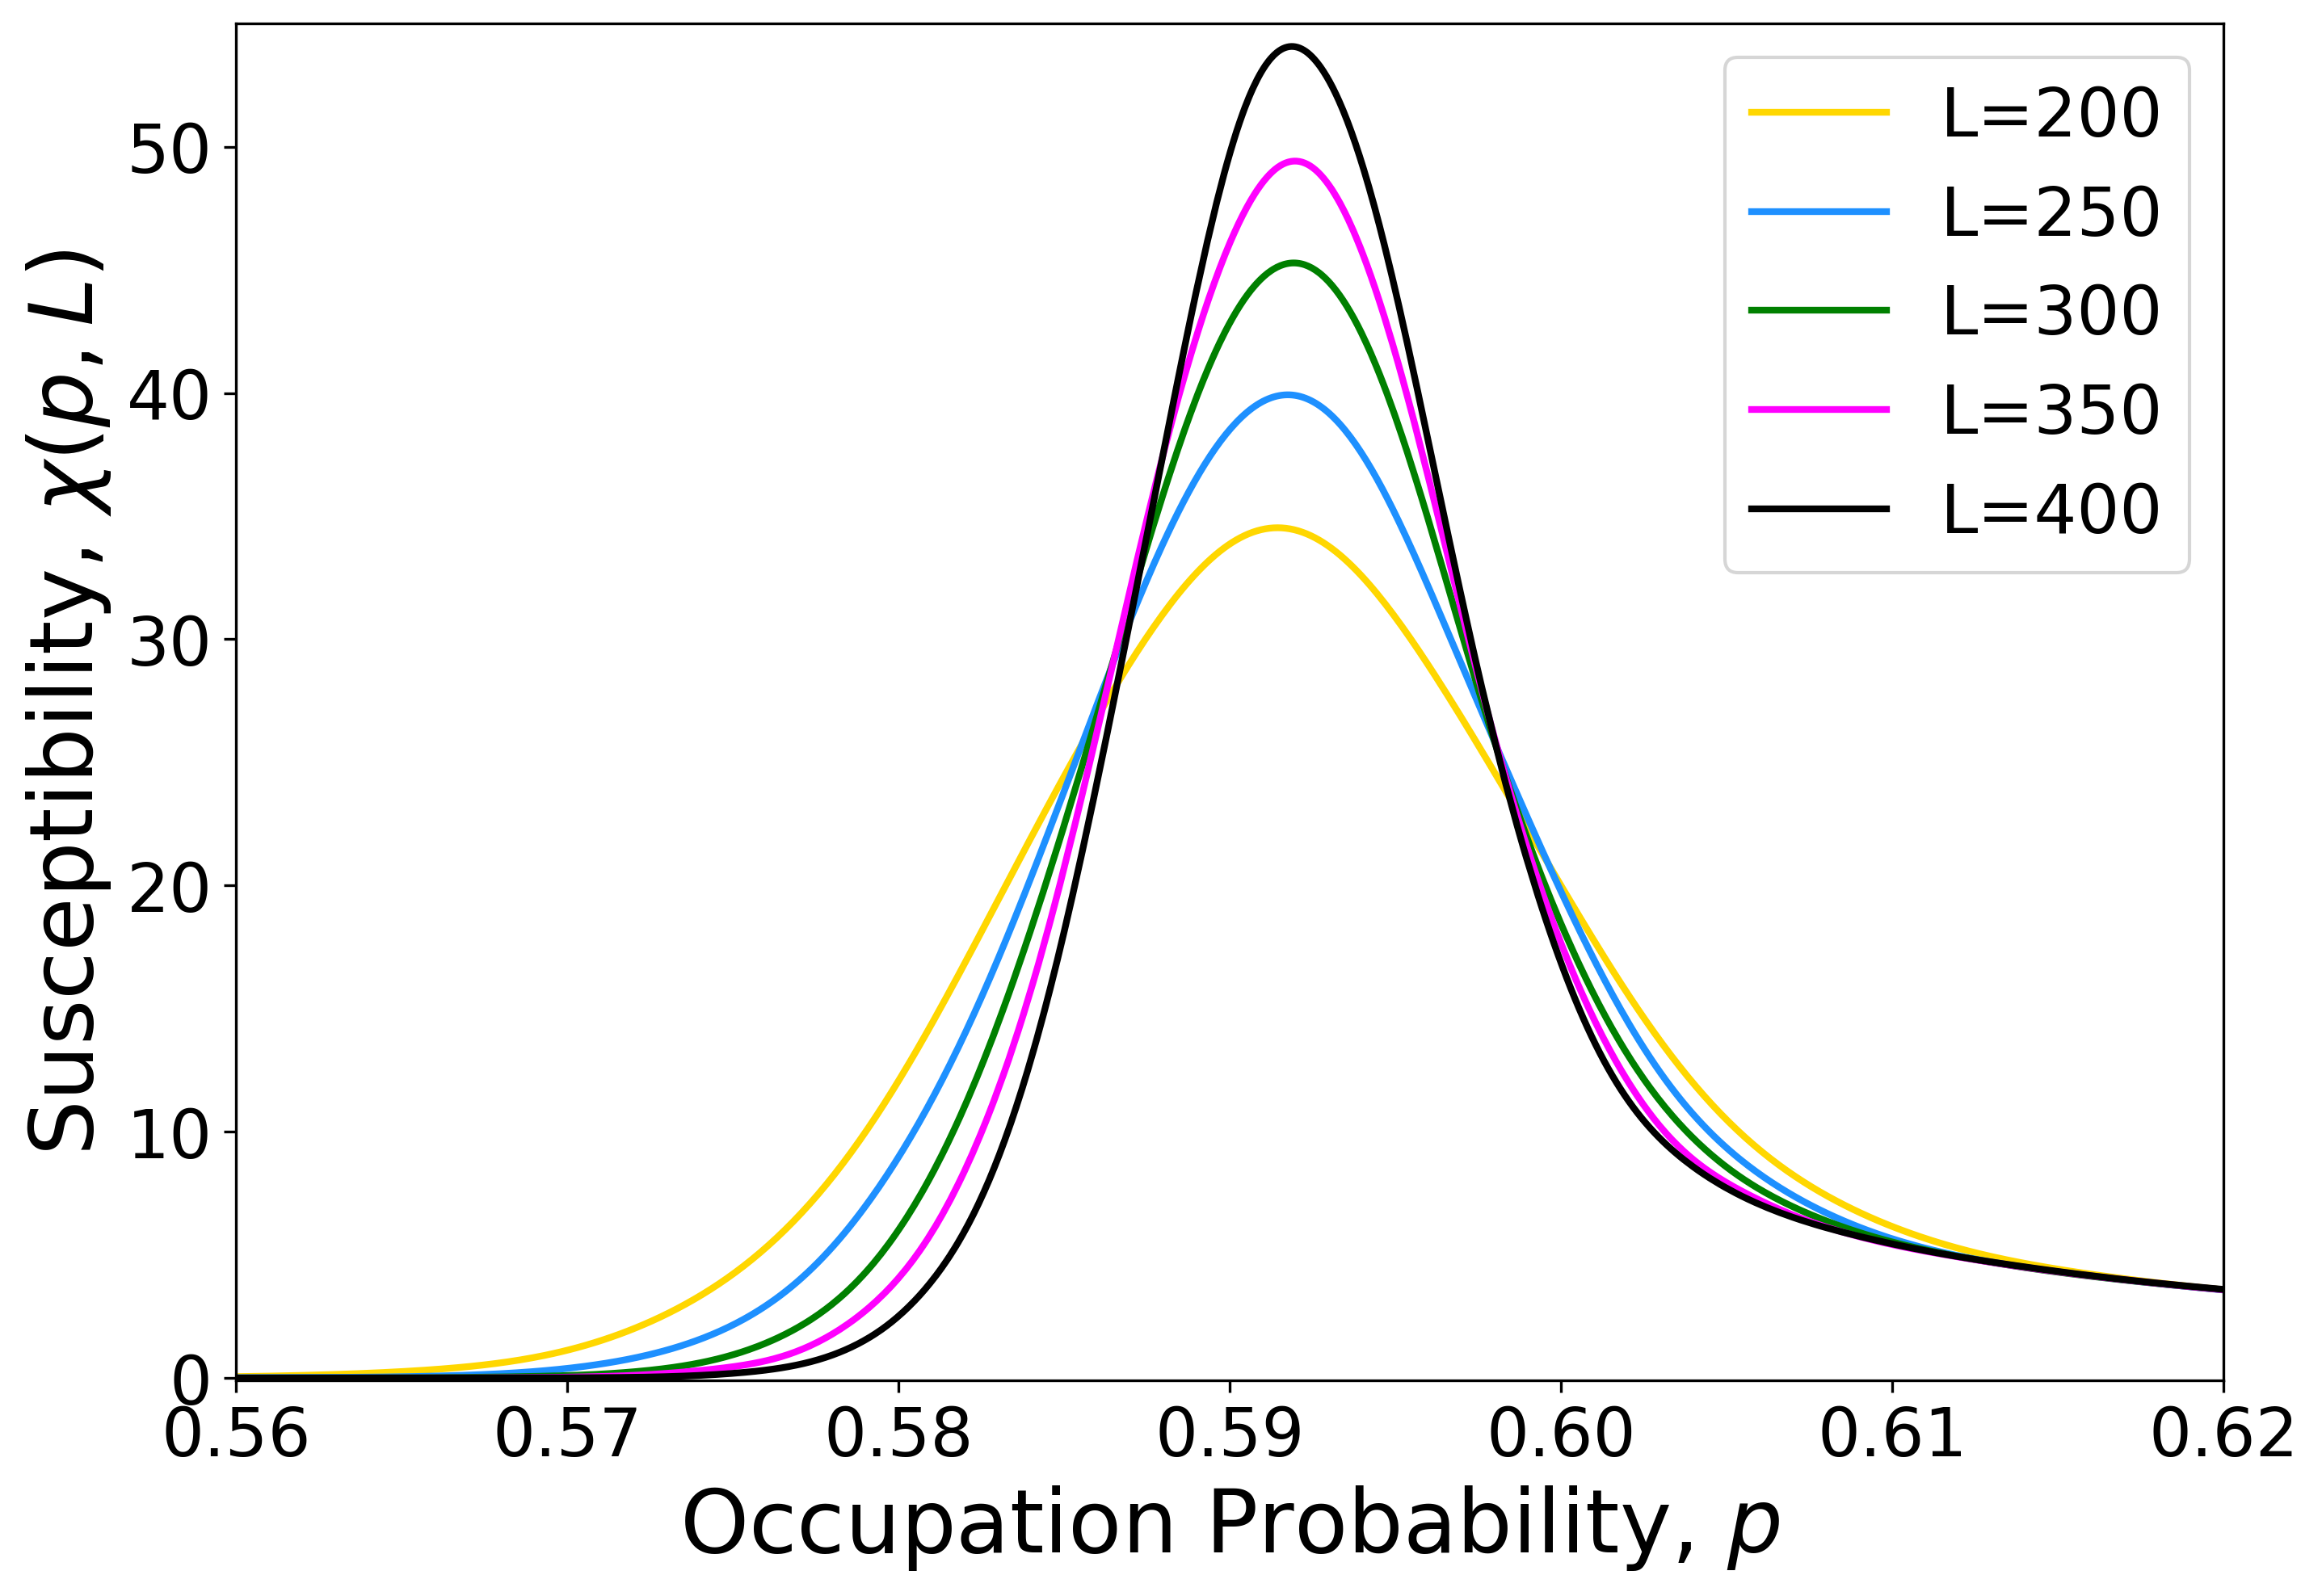

In [22]:
fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)
lengths = np.sort(list(data.keys()))
a = 0
for L in lengths:
    p, C, C_conv, X, X_conv = data[L].T
    
    x = p
    y = X_conv
    
    size = x.shape[0]
    indices = np.linspace(0, size-1, size // 5, dtype=int)
    ax.plot(x[indices], y[indices], label='L={}'.format(L), linewidth=2, color=colors[a])
    a += 1
    pass
    
ax.set_position([0.12, 0.14, 0.82, 0.8])
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel(r'Occupation Probability, $p$', get_font(26))
plt.ylabel(r'Susceptibility, $\chi (p,L)$', get_font(26))
# plt.title('Susceptibility vs Occupation Probability', font)

plt.xlim(0.56, 0.62)
plt.ylim(-0.1, 55)


out_file_name = out_img_dir + signature
out_file_name += '_susceptibility-pc{:.4f}.eps'.format(pc)
print(out_file_name)
plt.savefig(out_file_name)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic_-without-_susceptibility-data_collapse-pc0.5927_gamma_0.6407_nu_0.750.eps


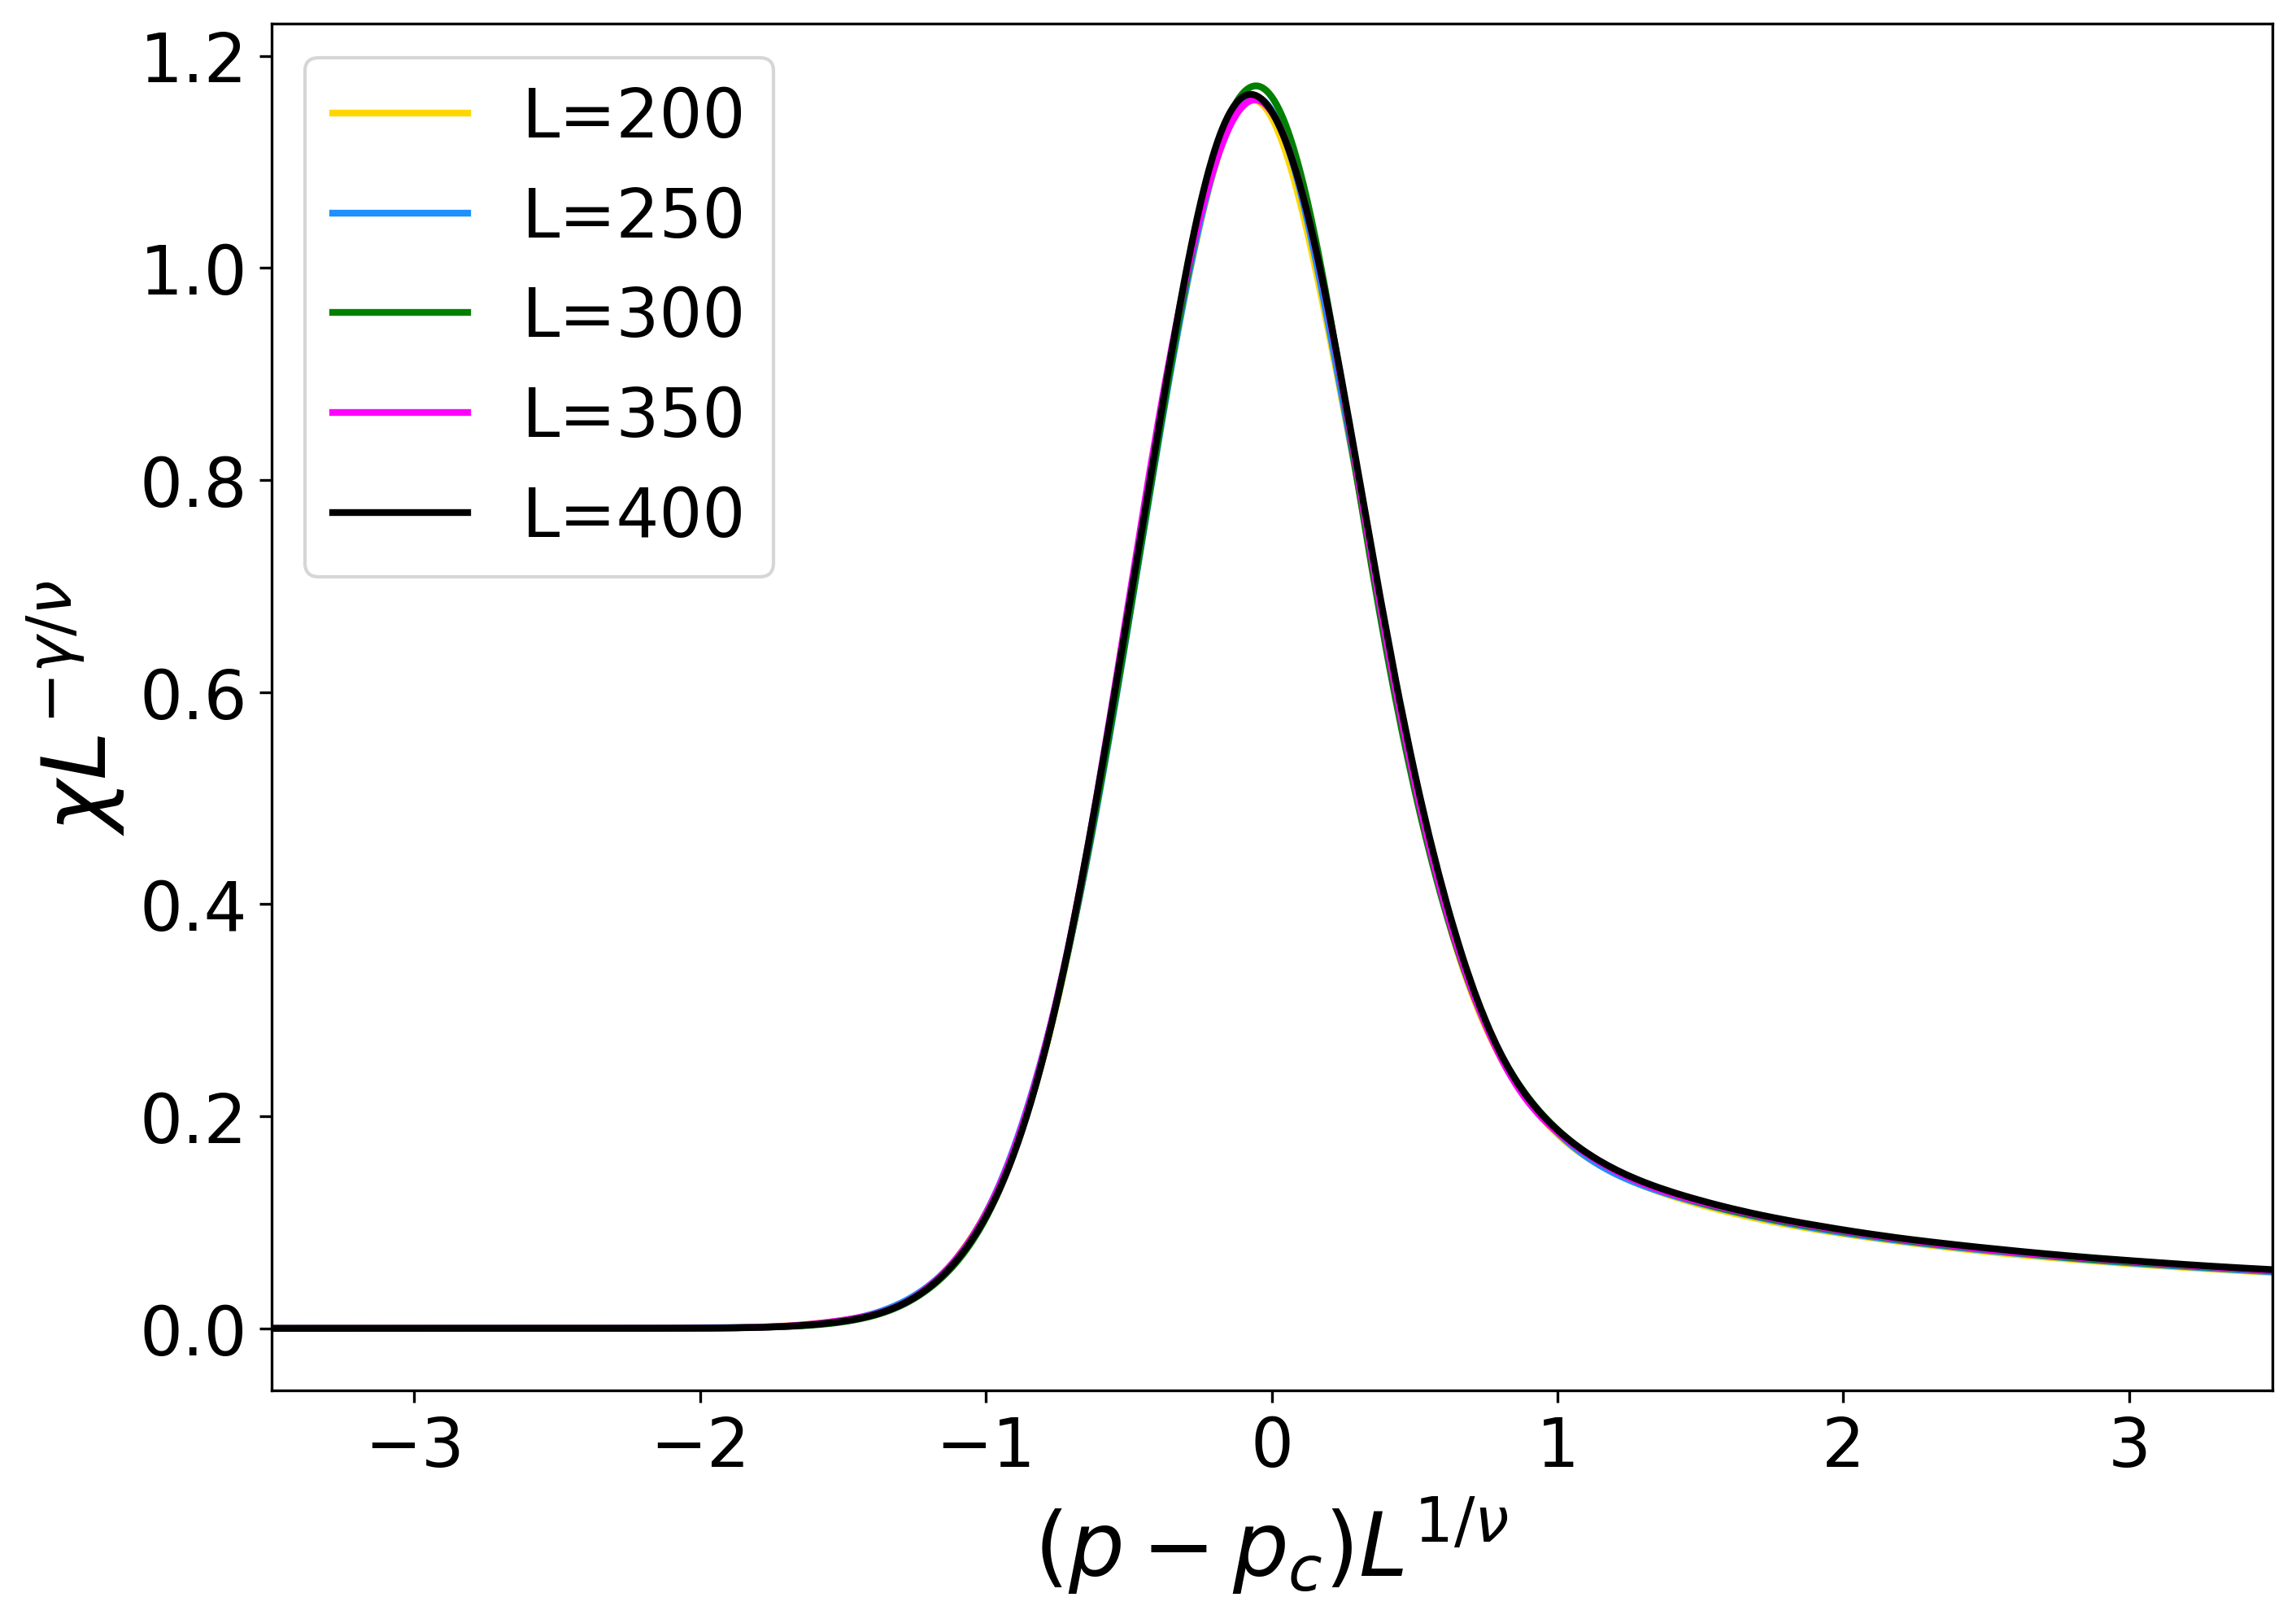

In [25]:
fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)
lengths = np.sort(list(data.keys()))
a = 0
for L in lengths:
    p, C, C_conv, X, X_conv = data[L].T
    
    x = (p-pc)*L**(one_by_nu)
    y = X_conv*L**(-gamma_by_nu)
    size = x.shape[0]
    indices = np.linspace(0, size-1, size // 5, dtype=int)
    ax.plot(x[indices], y[indices], label='L={}'.format(L), linewidth=2, color=colors[a])
    a += 1
    pass
    
ax.set_position([0.12, 0.14, 0.82, 0.8])
plt.legend(loc=2, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel(r'$(p-p_c) L^{1/\nu}$', get_font(26))
plt.ylabel(r'$\chi L^{-\gamma/\nu}$', get_font(26))
# plt.title('Susceptibility vs Occupation Probability', font)
plt.xlim(-3.5, 3.5)

## plotting exponent finding graph
# i_axes = inset_axes(ax, 
#                     width="30%", # width = 30% of parent_bbox
#                     height="30%", # height : 1 inch
#                     #height=1, # height : 1 inch
#                     loc=1)

# plt.plot(xh_log[:,0], xh_log[:,1], 'oc', markersize=8)
# x = np.linspace(np.min(xh_log[:,0]), np.max(xh_log[:,0]), 10)
# y = regress[0]*x + regress[1]
# plt.plot(x, y, 'k', linewidth=1)

# plt.xlabel(r'$\log(L)$', get_font(18))
# plt.ylabel(r'$\log(\chi_h)$', get_font(18))
# plt.tick_params(axis='both', which='major', labelsize=14)
# fig.text(0.7, 0.85, r"$\gamma/\nu={:.4}$".format(gamma_by_nu), get_font(16))


## saving to file
out_file_name = out_img_dir + signature  + "-without-"
out_file_name += '_susceptibility-data_collapse-pc{:.4f}_gamma_{:.4f}_nu_{:.3f}.eps'.format(pc, gamma_by_nu, one_by_nu)
print(out_file_name)
plt.savefig(out_file_name)